In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [31]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)))#/Af))


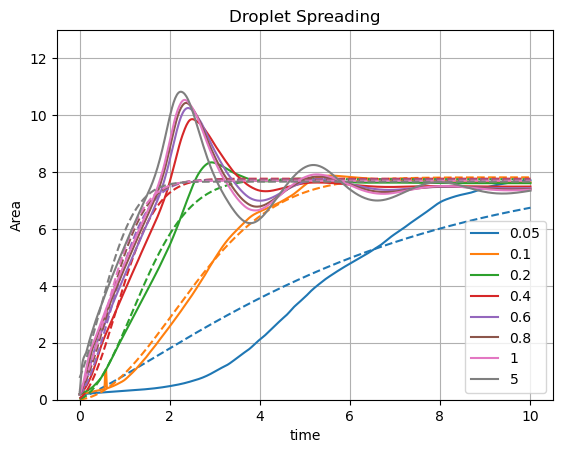

In [41]:
file_temp=next(os.walk('.'))[1]
cst=0
f_name=[""]
f_id=[""]
for temp in file_temp:
    match=re.search("monitor_*",temp)
    if match:
        f_name.append(temp)
        f_id.append(temp.split('_')[1])
        cst=cst+1
f_name=np.array(f_name[1:])#,dtype=np.str)
f_id=np.array(f_id[1:],dtype=np.float32)
f_sorted=np.sort(f_id)
index=np.zeros(np.size(f_id)).astype('int32')
f_name_sorted=np.empty(np.size(f_name),dtype='<U12')
for i in range(np.size(f_id)):
    index[i]=np.where(f_id==f_sorted[i])[0][0].astype('int32')#,f_id)
    f_name_sorted[i]=f_name[index[i]]

i=0
for f in f_name_sorted:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
    xdata=data['Time'].to_numpy()
    ydata=np.pi*np.power(data['Wetted'].to_numpy(),2)
    p=plt.plot(xdata,ydata,label=f.split('_')[1])
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
    popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-1,[5,2,10,5]))
    p=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color())
    i=i+1

plt.ylim([0,np.pi*np.power(np.max(data['Wetted']),2)*1.2])
plt.title('Droplet Spreading')
plt.xlabel('time')
plt.ylabel('Area')
plt.legend()
plt.grid()
plt.show()
    